<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 4

## San Francisco Data

---

[San Francisco provides a wealth of data on the city to the public.](https://data.sfgov.org/) Project 4 is all about exploring this data and modeling interesting relationships with regression.

Project 4 is also much more open-ended than the previous projects. You are more responsible for finding things about the data that interest you, coming up with your own hypothesis about it, and reporting on the analysis you carry out. That being said, there are still specific requirements and restrictions on the type of models you will be constructing.

---

## Notes on the data

We have gone through the above website and pulled out a variety of different datasets that we think are particularly interesting. Some of the datasets are from external sources as well, but all are related to San Francisco. A high level overview of data folders is provided after the project requirements section.

**There is a lot of different data. You are _NOT_ expected to explore all of it or include all of it in analyses.** The point of the project is to focus on aspects of San Francisco that are particularly interesting to you from a modeling point of view. 

**The uncompressed data is a large filesize.** Even the compressed data is pretty large. The data is compressed into a .7z format which has one of the smallest filesizes available. You will likely need a 3rd party app to extract it. 

### Recommended Utilities for .7z
- For OSX [Keka](http://www.kekaosx.com/en/) or [The Unarchiver](http://wakaba.c3.cx/s/apps/unarchiver.html). 
- For Windows [7-zip](http://www.7-zip.org/) is the standard. 
- For Linux try the `p7zip` utility.  `sudo apt-get install p7zip`.

---

## Project requirements

**You will be performing 4 different sections of analysis on the San Francisco data.**

**Models must be regression. This means that your target variable needs to be numeric/continuous**

Do not perform classification models – this will be the topic of week 4.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 1. Choose a dataset or datasets of interest to you and perform EDA

---

1. Explain what the data is. This may include multiple csv files. Some of this data has hard to understand codes representing the variables. Nearly all data is pulled from https://data.sfgov.org/ so this is a very good resource for determining what the data is.
- Clean the data.
- Develop and state clearly a hypothesis about the data that you would want to test.
- Create some initial visualizations on the portions of the data relevant to your hypothesis.

The data contains a log of SFFD incidents between 2003 and the first quarter of 2014

In [2]:
import numpy as np
import pandas as pd
import patsy
from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.cross_validation import cross_val_score
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn import grid_search
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import StandardScaler

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

In [3]:
filename = '/Users/katbishop/Desktop/DSI-SF2-bishopkd/datasets/san_francisco/san_francisco/fire_data/fire_incidents.csv'
df = pd.read_csv(filename)

/Users/katbishop/anaconda/envs/dsi/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (11,12,19,44,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [220]:
df.shape

(406736, 63)

In [221]:
df.isnull().sum()

Incident Number                                      0
Exposure Number                                      0
Address                                            103
Incident Date                                        0
Call Number                                          0
Alarm DtTm                                           0
Arrival DtTm                                        18
Close DtTm                                           0
City                                              1227
Zipcode                                          72387
Battalion                                            0
Station Area                                       529
Box                                             297821
Suppression Units                                    0
Suppression Personnel                                0
EMS Units                                            0
EMS Personnel                                        0
Other Units                                          0
Other Pers

In [222]:
df.columns

Index([u'Incident Number', u'Exposure Number', u'Address', u'Incident Date',
       u'Call Number', u'Alarm DtTm', u'Arrival DtTm', u'Close DtTm', u'City',
       u'Zipcode', u'Battalion', u'Station Area', u'Box', u'Suppression Units',
       u'Suppression Personnel', u'EMS Units', u'EMS Personnel',
       u'Other Units', u'Other Personnel', u'First Unit On Scene',
       u'Estimated Property Loss', u'Estimated Contents Loss',
       u'Fire Fatalities', u'Fire Injuries', u'Civilian Fatalities',
       u'Civilian Injuries', u'Number of Alarms', u'Primary Situation',
       u'Mutual Aid', u'Action Taken Primary', u'Action Taken Secondary',
       u'Action Taken Other', u'Detector Alerted Occupants', u'Property Use',
       u'Area of Fire Origin', u'Ignition Cause', u'Ignition Factor Primary',
       u'Ignition Factor Secondary', u'Heat Source', u'Item First Ignited',
       u'Human Factors Associated with Ignition', u'Structure Type',
       u'Structure Status', u'Floor of Fire Origin', 

In [4]:
df.rename(columns={'Incident Number': 'incident_num',
                   'Incident Date': 'incident_date',
                   'Alarm DtTm': 'alarm_time', 
                   'Arrival DtTm': 'arrival_time',
                   'Zipcode': 'zip',
                   'EMS Units': 'ems_units',
                   'First Unit On Scene': 'first_on_scene',
                   'Fire Fatalities': 'fire_fatalities', 
                   'Fire Injuries': 'fire_injuries', 
                   'Civilian Fatalities': 'civilian_fatalities',
                   'Civilian Injuries': 'civilian_injuries', 
                   'Primary Situation': 'primary_situation',
                   'Detector Alerted Occupants':  'detector_alerted_occupants',
                   'Neighborhood  District': 'neighborhood', 
                   'Location': 'location'}, inplace=True)

In [5]:
df = df[['incident_num','incident_date','alarm_time', 'arrival_time','ems_units','first_on_scene','fire_fatalities', 'fire_injuries', 'civilian_fatalities','civilian_injuries', 'primary_situation','neighborhood']]

In [6]:
# removed nulls for neighborhood, arrival time, first on the scene
clean_list = ['neighborhood','arrival_time','first_on_scene']
for col in clean_list:
    clean = (df[col].notnull())
    df = df[clean]

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259883 entries, 2 to 402687
Data columns (total 12 columns):
incident_num           259883 non-null int64
incident_date          259883 non-null object
alarm_time             259883 non-null object
arrival_time           259883 non-null object
ems_units              259883 non-null int64
first_on_scene         259883 non-null object
fire_fatalities        259883 non-null int64
fire_injuries          259883 non-null int64
civilian_fatalities    259883 non-null int64
civilian_injuries      259883 non-null int64
primary_situation      259883 non-null object
neighborhood           259883 non-null object
dtypes: int64(6), object(6)
memory usage: 25.8+ MB


In [227]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
incident_num,259883.0,8.265417e+06,3.271682e+06,3000003.0,5085921.5,8090890.0,11068668.0,14032351.0
ems_units,259883.0,1.313630e-01,7.872384e-01,0.0,0.0,0.0,0.0,96.0
fire_fatalities,259883.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
fire_injuries,259883.0,3.463097e-04,2.961758e-02,0.0,0.0,0.0,0.0,9.0
civilian_fatalities,259883.0,4.232674e-05,8.087800e-03,0.0,0.0,0.0,0.0,3.0
civilian_injuries,259883.0,1.073560e-03,7.235910e-02,0.0,0.0,0.0,0.0,24.0


In [7]:
# given that there are zero injuries or fatalities when ems_units are between 30 - 96
# i'm assuming these are data entry errors and removing them (21 rows)
outlier_mask = (df['ems_units'] < 30)
df = df[outlier_mask]

In [8]:
df['incident_date'] = pd.to_datetime(df['incident_date'])
print df['incident_date'].min()
print df['incident_date'].max()

2003-01-01 00:00:00
2014-04-06 00:00:00


hypothosis: Can civilian fatalities be predicted by neighborhood, number of ems units called, first unit on the scene,
incident month, and the time it took between the initial call and SFFD arrival.

In [9]:
# format and create new column
df['alarm_time'] = pd.to_datetime(df['alarm_time'])
df['arrival_time'] = pd.to_datetime(df['arrival_time'])
df['mins_to_scene'] = -(df['alarm_time']-df['arrival_time']).astype('timedelta64[m]')


In [10]:
df['incident_month'] = df['incident_date'].map(lambda x: x.month)

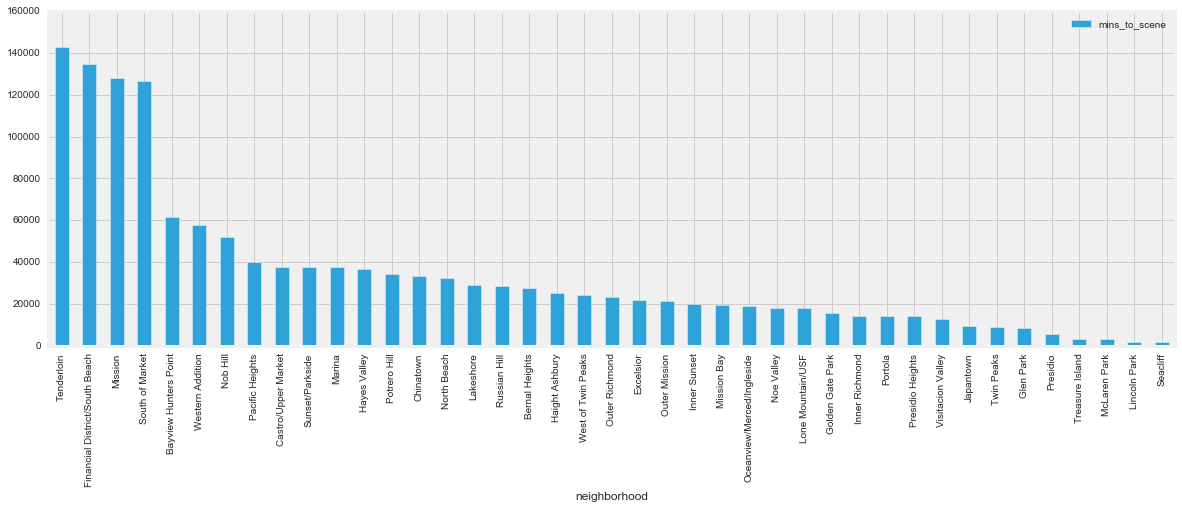

In [232]:
df.groupby(['neighborhood'])[['mins_to_scene']].sum().sort_values('mins_to_scene', ascending=0).plot(kind='bar', figsize=(18,6))

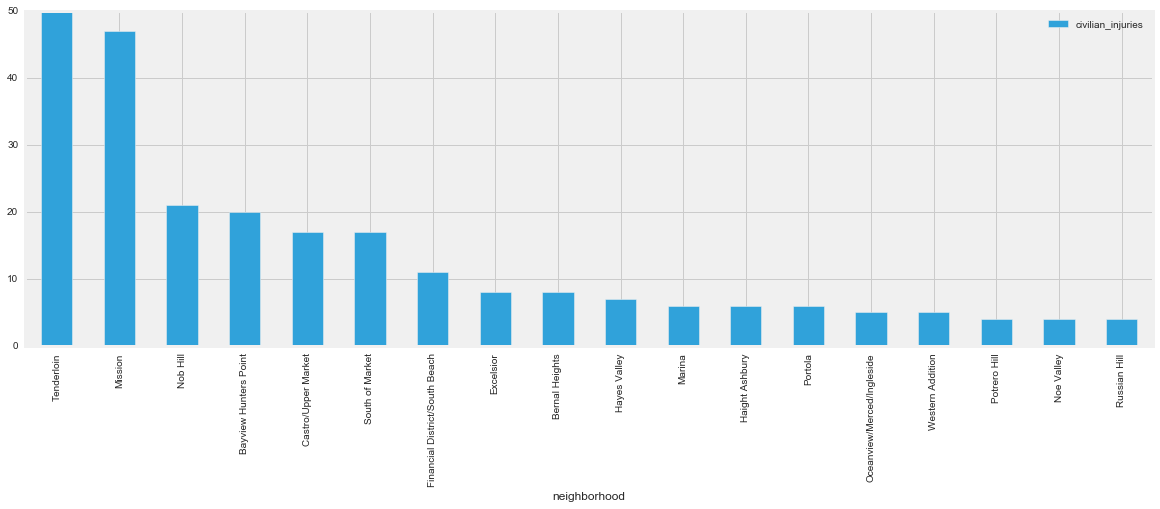

In [233]:
df.groupby(['neighborhood'])[['civilian_injuries']].sum().sort_values('civilian_injuries', ascending=0).head(18).plot(kind='bar', figsize=(18,6))

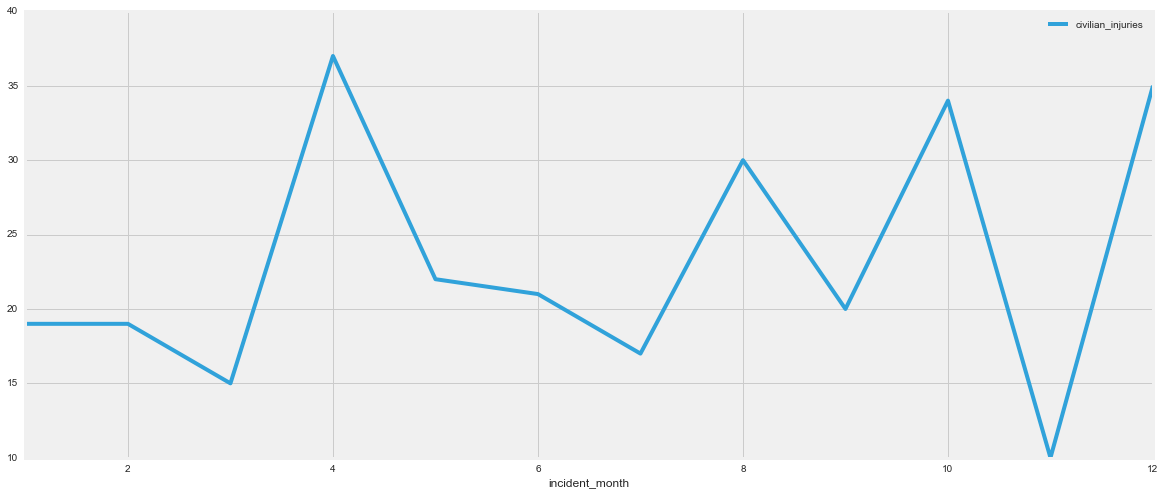

In [234]:
df.groupby(['incident_month'])[['civilian_injuries']].sum().plot( figsize=(18,8))

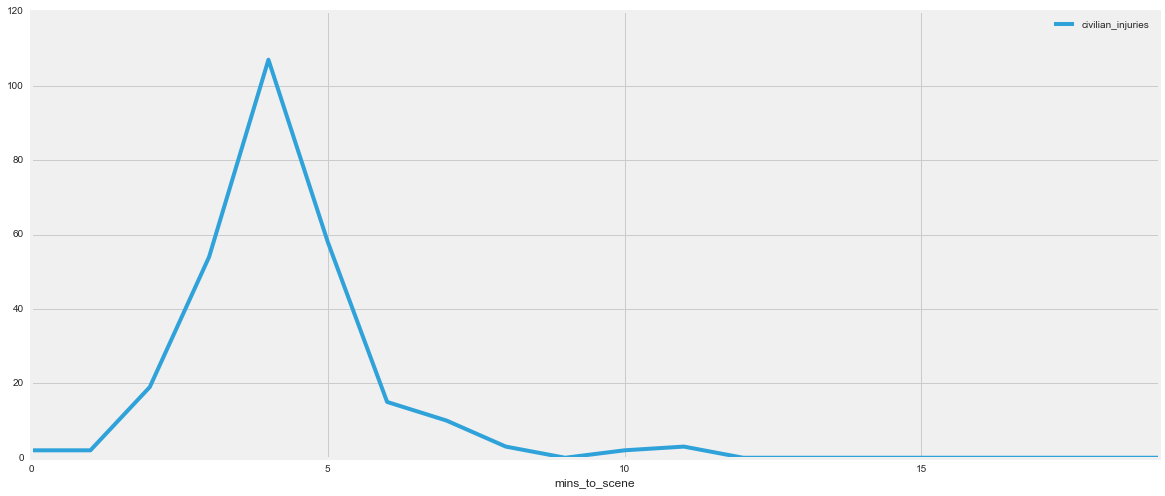

In [235]:
mins_mask = (df['mins_to_scene'] < 20)
df[mins_mask].groupby(['mins_to_scene'])[['civilian_injuries']].sum().plot( figsize=(18,8))

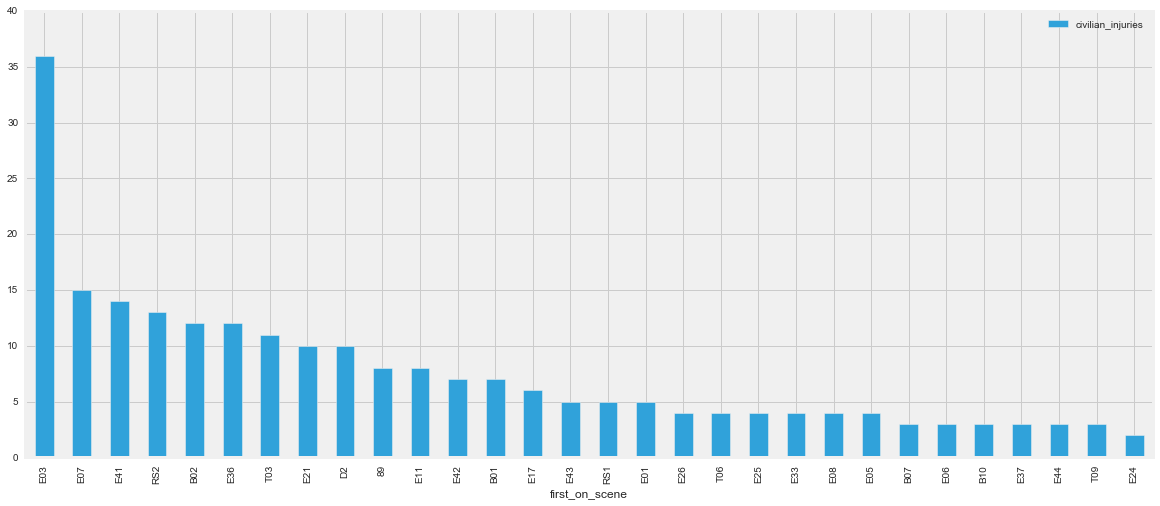

In [236]:
df.groupby(['first_on_scene'])[['civilian_injuries']].sum().sort_values('civilian_injuries', ascending=0).head(30).plot(kind='bar', figsize=(18,8))

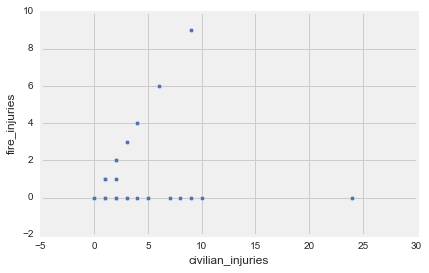

In [237]:
df.plot(kind='scatter', x='civilian_injuries', y='fire_injuries')

In [238]:
# I wanted to predict civilian injuries by neighborhood, but then decided I couldn't use that predictor (I now know
# about C()). So I switched to attempting to predict civilian injuries by minutes from call to arrival at scene, 
# ems units called, and injuries sustained by firemen. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2. Construct and evaluate a linear regression model on the data

---

1. State the variables that are predictors in your linear regression and the target variable.
- Investigate and remove any outliers or other problems in your data. _This is a subjective process._
- Construct a linear regression model.
- Evaluate the model. How does the $R^2$ of the overall model compare to cross-validated $R^2$. What do the differences in $R^2$ mean?
  - Use test / train split
  - Use K-Folds
  - Compare and explain your results with both
- Visualize the evaluation metrics of your analysis in clear charts.
- Summarize your results in the context of your hypothesis. Frame this as if you are presenting to non-technical readers.


In [11]:
df_sub = df[['civilian_injuries','mins_to_scene','incident_month', 'ems_units','fire_injuries']]

In [243]:
df_sub.corr()

,civilian_injuries,mins_to_scene,incident_month,ems_units,fire_injuries
civilian_injuries,1.000000,0.033626,0.001352,0.054510,0.410992
mins_to_scene,0.033626,1.000000,-0.003578,0.038527,0.085521
incident_month,0.001352,-0.003578,1.000000,-0.001194,-0.000435
ems_units,0.054510,0.038527,-0.001194,1.000000,0.059465
fire_injuries,0.410992,0.085521,-0.000435,0.059465,1.000000


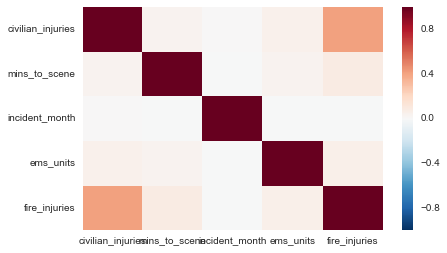

In [244]:
sns.heatmap(df_sub.corr())

In [12]:
formula = 'civilian_injuries ~ mins_to_scene +  incident_month +ems_units + fire_injuries -1' 
y,X = patsy.dmatrices(formula, df_sub , return_type='dataframe')

In [13]:
# test/train split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test).ravel()

print "Score:", model.score(X_test, y_test)

(181903, 4) (181903, 1)
(77959, 4) (77959, 1)
Score: 0.142927587103


In [25]:
plt.scatter(y, predictions)

Cross-validated scores: [ 1.          1.          1.          1.          0.78752721]
Cross-Predicted Accuracy: 0.792202611919


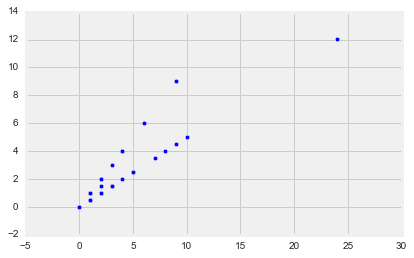

In [15]:
# k-folds
formula = 'civilian_injuries ~ mins_to_scene  + incident_month + ems_units + fire_injuries -1' #  
y,X = patsy.dmatrices(formula, df_sub , return_type='dataframe')

lm = linear_model.LinearRegression()

scores = cross_val_score(lm, df_sub, y, cv=5) 
print "Cross-validated scores:", scores # result of each fold

predictions = cross_val_predict(lm, df_sub, y, cv=5)
plt.scatter(y, predictions)

accuracy = metrics.r2_score(y, predictions)
print "Cross-Predicted Accuracy:", accuracy # R^2 


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2.2 Explain $R^2$ vs. mean squared error (MSE)

---

1. If you have negative $R^2$ values in cross-validation, what does this mean? 
2. Why can $R^2$ only be negative when the model is tested on new data?

In [ ]:
# 1. It means that your prediction is worse than the baseline
# 2. Because the train data builds the best fit for available data, at it's worst the regression would be the baseline/
#     just taking the mean.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3. Combine multiple sources of data and evaluate a model with regularized regression

---

**I recommend having many predictors to see benefits from regularization methods, but it's up to you.**

1. Use _NEW_ sources of data for this section. It should not be related to your analysis/hypothesis from section 1.
- Like in part 1, you should state a hypothesis and perform data cleaning and EDA _only_ on the relevant portions of your data. Don't waste time!
- Construct and evaluate different models with cross-validated $R^2$. Compare LinearRegression, Lasso, Ridge, and ElasticNet. Find the optimal hyperparameters (alpha, l1_ratio) using gridsearch.
- Report on which model is best, and why that might be the case (hint: does your data have multicollinearity? Irrelevant variables? Both?)
- Plot visuals that compare the performance of the four models.


In [26]:
fname = '/Users/katbishop/Desktop/DSI-SF2-bishopkd/datasets/san_francisco/san_francisco/assessor_office/assessor_data_2011_2012.csv'
assess = pd.read_csv(fname)
assess.head(2)

/Users/katbishop/anaconda/envs/dsi/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,PROPLOC,RP1NBRCDE,RP1PRCLID,RP1VOLUME,RP1CLACDE,YRBLT,BATHS,BEDS,ROOMS,STOREYNO,...,EXEMPTYPE,RP1STACDE,RP1EXMVL2,RP1EXMVL1,ROLLYEAR,RECURRSALD,RP1FXTVAL,RP1IMPVAL,RP1LNDVAL,RP1PPTVAL
0,0000 0000 0000,08H,0001 001,1,G,1900,0,0,0,0,...,NaN,N,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0
1,0000 0000 0000,08H,0002 001,1,G,1900,0,0,0,0,...,NaN,N,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
assess.columns

In [27]:
assess.rename(columns ={
        'YRBLT' : 'year_built', 
        'BATHS' : 'num_baths', 
        'BEDS' : 'num_bdrms', 
        'ROOMS' : 'num_rooms', 
        'STOREYNO' : 'num_stories' , 
        'UNITS' : 'num_units',
       'CHGDATE' : 'char_change_date', 
         'DEPTH' : 'lot_depth' , 
        'FRONT' : 'lot_frontage', 
        'SQFT' : 'sq_ft', 
        'FBA' : 'basement_area',
       'LAREA' : 'lot_area', 
        'ROLLYEAR' : 'roll_year',  
        'RP1FXTVAL' : 'fixture_value',
       'RP1IMPVAL' : 'improvement_value', 
        'RP1LNDVAL' : 'land_value', 
        'RP1PPTVAL' : 'property_value'   
    }, inplace=True)

In [28]:
drop_list = ['PROPLOC','ZONE', 'CONSTTYPE','LOTCODE','REPRISDATE', 'RP1RECDAT1', 'RP1DOCNO1' ,'OWNRPRCNT','EXEMPTYPE',
            'RECURRSALD','RP1EXMVL2' , 'RP1EXMVL1','RP1DOCNO2' , 'RP1TRACDE','RP1STACDE','RP1NBRCDE', 'RP1PRCLID', 
             'RP1VOLUME', 'RP1CLACDE']
for col in drop_list:
    assess.drop(col, axis=1, inplace=True)

In [ ]:
assess.head()

In [251]:
assess.describe().T

,count,mean,std,min,25%,50%,75%,max
year_built,193758.0,1788.077788,5.250223e+02,0.0,1908.0,1927.0,1956.0,9.185000e+03
num_baths,193758.0,2.374452,8.758683e+00,0.0,1.0,1.0,2.0,1.002000e+03
num_bdrms,193758.0,0.987340,9.645268e+00,0.0,0.0,0.0,2.0,3.800000e+03
num_rooms,193758.0,7.864388,2.339989e+01,-7.0,4.0,6.0,8.0,3.606000e+03
num_stories,193758.0,1.472543,5.119017e+00,-1.0,1.0,1.0,2.0,9.630000e+02
num_units,193758.0,1.849038,1.511783e+01,0.0,1.0,1.0,1.0,4.000000e+03
char_change_date,193758.0,7794.663069,3.914587e+03,0.0,9503.0,9903.0,9908.0,9.912000e+03
lot_depth,193758.0,8.928739,2.204348e+01,0.0,0.0,0.0,0.0,9.996000e+01
lot_frontage,193758.0,0.061868,1.683939e+00,0.0,0.0,0.0,0.0,9.939000e+01
sq_ft,193758.0,2928.229921,1.844255e+04,0.0,1000.0,1420.0,2272.0,3.015837e+06


In [370]:
assess['num_units'].unique()

array([  0,  29,   4,   3,   1,   2,  11,  51, 250,   6,   5, 252, 343,
        12,   8,   7,  26, 240, 164, 180, 170,  96,  39, 105,  18,  25,
        84,  35,  13,  46,  15, 136,  10,  32,   9,  14,  36,  17,  24,
        23,  16,  27,  20,  31,  90,  44,  62,  37,  34,  21,  87,  72,
        22,  42,  81,  33,  52,  40,  47,  56,  19,  48,  82,  43,  38,
        30,  28, 360, 362, 185,  60,  85, 130, 402, 392,  69,  92,  58,
        66, 126, 118,  45,  41,  61, 190,  88,  73,  55,  63, 172,  50,
       100, 102,  59,  49,  99,  93,  70,  75,  78, 108, 149,  53, 146,
       445,  57,  54,  79,  95, 114,  68,  80, 111, 137,  97,  98,  67,
       109, 156, 133, 201,  89,  64, 154, 101, 119, 151, 198, 110,  65,
        83,  86, 120, 134, 197, 124,  77, 175, 231, 217, 241, 140, 221,
       260,  74, 499, 117, 155, 145, 138, 169, 300, 122, 103, 183, 144,
       142, 115, 106, 107, 131, 168, 158, 244, 132, 397, 440, 204, 423,
       265,  76, 104,  91, 206, 112, 405, 411, 189, 330, 161, 25

In [30]:
assess.dropna()

In [31]:
# exclude unreasonable dates (22 rows)
year_outlier = ((assess['year_built'] > 1700) & (assess['year_built'] <= 2015))
assess = assess[year_outlier]


In [32]:
# there are a lot of extreme sq_ft and lot_area numbers (5 mill), I decided to subset and a lower extreme number.
sqft_outlier = ((assess['sq_ft'] > 100) & (assess['sq_ft'] < 50000))
assess = assess[sqft_outlier]

In [33]:
lot_outlier = ((assess['lot_area'] > 100) & (assess['lot_area'] < 50000))
assess = assess[lot_outlier]

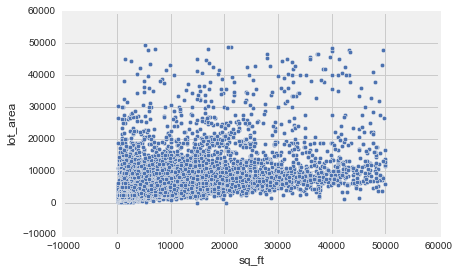

In [257]:
assess.plot(kind='scatter', x='sq_ft', y='lot_area')

In [377]:
assess.columns

Index([u'year_built', u'num_baths', u'num_bdrms', u'num_rooms', u'num_stories',
       u'num_units', u'char_change_date', u'lot_depth', u'lot_frontage',
       u'sq_ft', u'basement_area', u'lot_area', u'roll_year', u'fixture_value',
       u'improvement_value', u'land_value', u'property_value'],
      dtype='object')

In [34]:
#assess[['fixture_value','improvement_value','land_value','property_value']].head(20)
assess.rename(columns = {'property_value': 'pers_prop_value'}, inplace=True)
assess['total_value'] = assess['fixture_value']+ assess['improvement_value'] + assess['land_value']+ assess['pers_prop_value']
assess.head()

,year_built,num_baths,num_bdrms,num_rooms,num_stories,num_units,char_change_date,lot_depth,lot_frontage,sq_ft,basement_area,lot_area,roll_year,fixture_value,improvement_value,land_value,pers_prop_value,total_value
10,1953,12,0,19,2,4,811,37.5,0.0,24627,0.0,18906.25,11.0,0.0,5397256.0,11318327.0,0.0,16715583.0
12,1948,2,0,5,1,1,9908,36.0,0.0,6800,0.0,6800.00,11.0,0.0,758966.0,1346026.0,0.0,2104992.0
13,1993,0,0,0,2,1,9906,0.0,0.0,6100,0.0,43480.00,11.0,0.0,67831.0,1795627.0,0.0,1863458.0
14,1948,8,0,2,1,1,9908,80.0,0.0,4000,0.0,11000.00,11.0,0.0,192147.0,1268397.0,0.0,1460544.0
15,1948,5,0,1,1,1,9908,70.0,0.0,3500,0.0,9625.00,11.0,0.0,168046.0,1109846.0,0.0,1277892.0


In [35]:
formula = 'total_value ~ sq_ft + lot_depth + lot_area + num_baths + num_bdrms + -1'
y, X = patsy.dmatrices(formula, data=assess, return_type='dataframe')
y = y.values.ravel()
ss = StandardScaler()
Xn = ss.fit_transform(X)


In [36]:
# linear regression
lm = linear_model.LinearRegression()

lm_params = {
    'fit_intercept':  [True, False], 
    'normalize':      [False, True]
}

lm = LinearRegression()
best_lm = grid_search.GridSearchCV(lm, lm_params, cv=5)
lm_results = best_lm.fit(Xn, y)

lm_scores = cross_val_score(best_lm, Xn, y, cv=5)
print "LR best Score: ", lm_results.best_score_
print "LR Params: ", lm_results.best_params_

print 'LR score: ', lm_scores
print 'LR mean score: ',np.mean(lm_scores)


LR best Score:  -0.129266500094
LR Params:  {'normalize': False, 'fit_intercept': True}
LR score:  [ 0.16393069  0.15732114 -1.24966924  0.14323448  0.13886069]
LR mean score:  -0.129264446895


In [39]:
# lasso
alphas = np.logspace(0,5,20)
lasso_params = {
    'fit_intercept':  [True, False], 
    'normalize':      [False, True],
    'alpha': alphas
}

lasso = Lasso()
best_lasso = grid_search.GridSearchCV(lasso, lasso_params, cv=5)
l_results = best_lasso.fit(Xn, y)

lasso_scores = cross_val_score(best_lasso, Xn, y, cv=5)
print "Lasso best Score: ", l_results.best_score_
print "Lasso Params: ", l_results.best_params_

print 'lasso score: ', lasso_scores
print 'lasso mean score: ',np.mean(lasso_scores)



Lasso best Score:  0.177613442582
Lasso Params:  {'normalize': False, 'alpha': 29763.514416313192, 'fit_intercept': True}
lasso score:  [ 0.15128543  0.14917379  0.18204405  0.22876463  0.12810729]
lasso mean score:  0.167875039767


In [40]:
# ridge
alphas = np.logspace(0,5,20)
ridge_params = {
    'fit_intercept':  [True, False], 
    'normalize':      [False, True],
    'alpha': alphas
}

ridge = Ridge()
best_ridge = grid_search.GridSearchCV(ridge, ridge_params, cv=5)
r_results = best_ridge.fit(Xn, y)

ridge_scores = cross_val_score(best_ridge, Xn, y, cv=5)
print "Ridge best Score: ", r_results.best_score_
print "Ridge Params: ", r_results.best_params_

print 'Ridge score: ', ridge_scores
print 'Ridge mean score: ',np.mean(ridge_scores)



Ridge best Score:  0.15687807514
Ridge Params:  {'normalize': False, 'alpha': 29763.514416313192, 'fit_intercept': True}
Ridge score:  [ 0.1016218   0.15264224 -0.28725148  0.24767753  0.07741514]
Ridge mean score:  0.0584210452247


In [41]:
# elasticnet
alphas = np.logspace(0,5,20)
elast_params = {
    'fit_intercept':  [True, False], 
    'normalize':      [False, True],
    'alpha': alphas
}

elast = ElasticNet()
best_elast = grid_search.GridSearchCV(elast, elast_params, cv=5)
e_results = best_elast.fit(Xn, y)

elast_scores = cross_val_score(best_elast, Xn, y, cv=5)
print "ElasticNet best Score: ", e_results.best_score_
print "ElasticNet Params: ", e_results.best_params_

print 'ElasticNet score: ', elast_scores
print 'ElasticNet mean score: ',np.mean(elast_scores)


ElasticNet best Score:  0.151274005832
ElasticNet Params:  {'normalize': False, 'alpha': 1.0, 'fit_intercept': True}
ElasticNet score:  [ 0.07154782  0.1416007   0.21583314  0.24742553  0.07996011]
ElasticNet mean score:  0.151273459742


In [42]:
print "LR best Score: ", lm_results.best_score_
print "Lasso best Score: ", l_results.best_score_
print "Ridge best Score: ", r_results.best_score_
print "ElasticNet best Score: ", e_results.best_score_

LR best Score:  -0.129266500094
Lasso best Score:  0.177613442582
Ridge best Score:  0.15687807514
ElasticNet best Score:  0.151274005832


In [ ]:
# Lasso performs the best. I believe this is due to irrelevant variables.

In [48]:
y_ = np.array(y).ravel()

ridge_resid = y_ - best_ridge.predict(Xn).ravel()
lasso_resid = y_ - best_lasso.predict(Xn).ravel()
elast_resid = y_ - best_elast.predict(Xn).ravel()


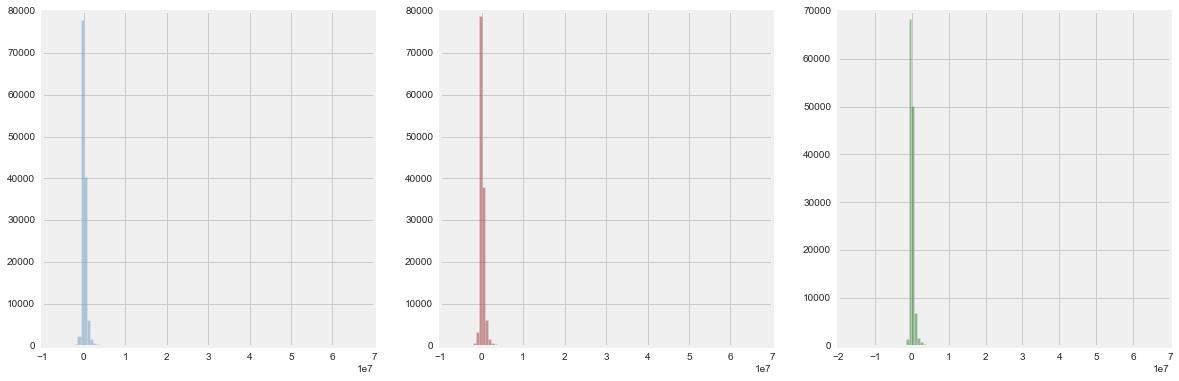

In [59]:
fig, axarr = plt.subplots(1, 3, figsize=(18, 6))

sns.distplot(lasso_resid, bins=100, hist=True, kde=False, 
             color='darkred', ax=axarr[1], label='Lasso residuals')

sns.distplot(ridge_resid, bins=100, hist=True, kde=False, 
             color='steelblue', ax=axarr[0], label='Ridge residuals')

sns.distplot(elast_resid, bins=100, hist=True, kde=False, 
             color='darkgreen', ax=axarr[2], label='ElasticNet residuals')

plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4. Conduct another, different analysis and report on it

---

1. Combining multiple sources of data (csv files) is required.
- Perform EDA and cleaning on relevant data.
- Construct and compare different regression models with cross-validation.
- Plot descriptive visuals you think are useful for understanding the data.
- Report on your findings.

This section is just another analysis like the first sections, but is more open-ended in what models you decide to build and why. Don't feel obligated to try every out every regularized regression model (though it doesn't hurt). 


In [60]:
f_name = '/Users/katbishop/Desktop/DSI-SF2-bishopkd/datasets/san_francisco/san_francisco/parks/park_donations_w_id.csv'
f_name2 =  '/Users/katbishop/Desktop/DSI-SF2-bishopkd/datasets/san_francisco/san_francisco/parks/park_scores.csv'

pddf = pd.read_csv(f_name)
pidf = pd.read_csv(f_name2)


In [200]:
pddf.head()

,Description,DonationID,ParkID,Close Date,Account Name,Amount,Type
0,To improve the baseball diamond at Herz Playgr...,163,137671.0,3/28/2014 0:00:00,"O.C. Jones & Sons, Inc.","$248,000.00",In-kind
1,To support renovations at Herz Playground.,175,137671.0,5/31/2014 0:00:00,A. Ruiz Construction Co. & Associates Inc.,"$117,000.00",In-kind
2,To provide interpretive and historical display...,157,10379.0,2/20/2014 0:00:00,Senator Milton Marks Memorial Philanthropic Fund,"$7,500.00",Cash
3,To support Camp Mather.,195,10379.0,9/27/2012 0:00:00,Phil Ginsburg,$500.00,Cash
4,To support Camp MAther operations,223,10379.0,2/11/2013 0:00:00,Lisbet & Stuart Sunshine,$200.00,Cash


In [62]:
pddf.dropna()
pidf.dropna()

In [64]:
park = pddf.merge(pidf.drop_duplicates(subset=['ParkID']), how='left')
park.head()

,Description,DonationID,ParkID,Close Date,Account Name,Amount,Type,PSA,Park,FQ,Score
0,To improve the baseball diamond at Herz Playgr...,163,137671.0,3/28/2014 0:00:00,"O.C. Jones & Sons, Inc.","$248,000.00",In-kind,PSA3,Herz Playground,FY07Q3,0.931
1,To support renovations at Herz Playground.,175,137671.0,5/31/2014 0:00:00,A. Ruiz Construction Co. & Associates Inc.,"$117,000.00",In-kind,PSA3,Herz Playground,FY07Q3,0.931
2,To provide interpretive and historical display...,157,10379.0,2/20/2014 0:00:00,Senator Milton Marks Memorial Philanthropic Fund,"$7,500.00",Cash,NaN,NaN,NaN,NaN
3,To support Camp Mather.,195,10379.0,9/27/2012 0:00:00,Phil Ginsburg,$500.00,Cash,NaN,NaN,NaN,NaN
4,To support Camp MAther operations,223,10379.0,2/11/2013 0:00:00,Lisbet & Stuart Sunshine,$200.00,Cash,NaN,NaN,NaN,NaN


In [65]:
def clean_cash(col):
    try:
        new_col = float(col.replace('$',''))
    except:
        new_col = np.nan
    return new_col

park['Amount'] = park['Amount'].apply(clean_cash)

In [66]:
formula = 'Score ~ Amount + C(Type)  -1'
y, X = patsy.dmatrices(formula, data=park, return_type='dataframe')
ss = StandardScaler()
Xn = ss.fit_transform(X)    

In [67]:
# linear regression
lm = linear_model.LinearRegression()

p_params = {
    'fit_intercept':  [True, False], 
    'normalize':      [False, True]
}

lm = LinearRegression()
best_lm = grid_search.GridSearchCV(lm, p_params, cv=5)
lm_results = best_lm.fit(Xn, y)

lm_scores = cross_val_score(best_lm, Xn, y, cv=5)

print 'LR score: ', lm_scores
print 'LR mean score: ',np.mean(lm_scores)

LR score:  [ -6.20079997e-02  -3.25181630e-01  -1.46680267e+02   6.55684119e-02
  -1.34358717e+01]
LR mean score:  -32.0875519236


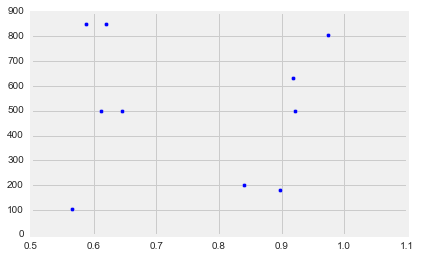

In [80]:
a = park.groupby(['ParkID'])[['Amount']].sum().reset_index()
b = park.groupby(['ParkID'])[['Score']].mean().reset_index()
c = pd.merge(a,b, on='ParkID', how='left')

plt.scatter(data=c,x='Score',y='Amount')

In [ ]:
# after spending way too much time digging through datasets and then trying
# to force this one to be meaningful ... I'm going with "a terrible answer is still an answer".
# There is no correlation between park donations and park ratings. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.2 Ploting GridSearch with Lasso, Ridge, or Elasticnet
---
1. Using the gridsearch results, plot your score in relation to your parameters.
1. Plot the effect on your coefficients given alpha.
1. Plot any other parameter change to visualize the impact of any other hyperparameter.

It's helpful to understand the impact of parameters used in Gridsearch, and that you are comfortable working with the data that is generated for reporting to explore the results visually.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Bias-variance tradeoff

---

1. Select San Francisco data of your choice and construct a regularized regression model (this can be data from an earlier analysis if you like). Ideally the model should actually improve across regularization strengths...
- Gridsearch the regularization parameters to find the optimal.
- Plot the regularization parameter against the cross-validated $R^2$.
- Explain how regularization and regularization strength is related to the bias-variance tradeoff.


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Calculate the approximated $\text{bias}^2$ and variance across regularization strengths.

---

You can obviously use my code from the bias-variance lab to do this. 

Plot the bias and variance change _with_ the cross-validated $R^2$. 

You'll need to scale these values somehow to put them on the same chart (I recommend (MinMaxScaler)[http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html] to put $\text{bias}^2$ and variance on the same scale as cross-validated $R^2$.

<img src="http://imgur.com/HNPKfE8.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Custom regularized regression penalties

---

The $\lambda1$ and $\lambda2$ norm regularization penalties (Lasso and Ridge) are the most commonly used regularization penalties. They have a solid foundation in statistics and evidence of effectiveness. However, these are not the only possible penalties for regression – sometimes new, customized penalties give additional performance and predictive power to models depending on the context.

For example, when I worked in neuroscience [we created an effective penalized regression dubbed "GraphNet"](http://arxiv.org/abs/1110.4139) that combined the Lasso and Ridge penalties like in Elastic net with a third penalty that rewarded clustering of coefficients according to physical distance in FMRI brain activation data.

**Devise of and implement a penalized regression for San Francisco data.** What is your rationale – why would this be useful? How does it perform compared to the standard Ridge, Lasso, and Elastic Net penalties?